<a href="https://colab.research.google.com/github/Gopi-chand-26/ml_assignment_week_1/blob/main/ml_as_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation Step
Standardization complete - Mean: -0.0
Standardization complete - Std: 1.0

Applying Linear Discriminant Analysis (LDA)
Input shape: (150, 4)
LDA-transformed shape: (150, 2)
Variance explained by LDA components: [0.9912 0.0088]

Applying Principal Component Analysis (PCA)
Variance explained by PCA components: [0.7296 0.2285]

Generating visualizations for comparison


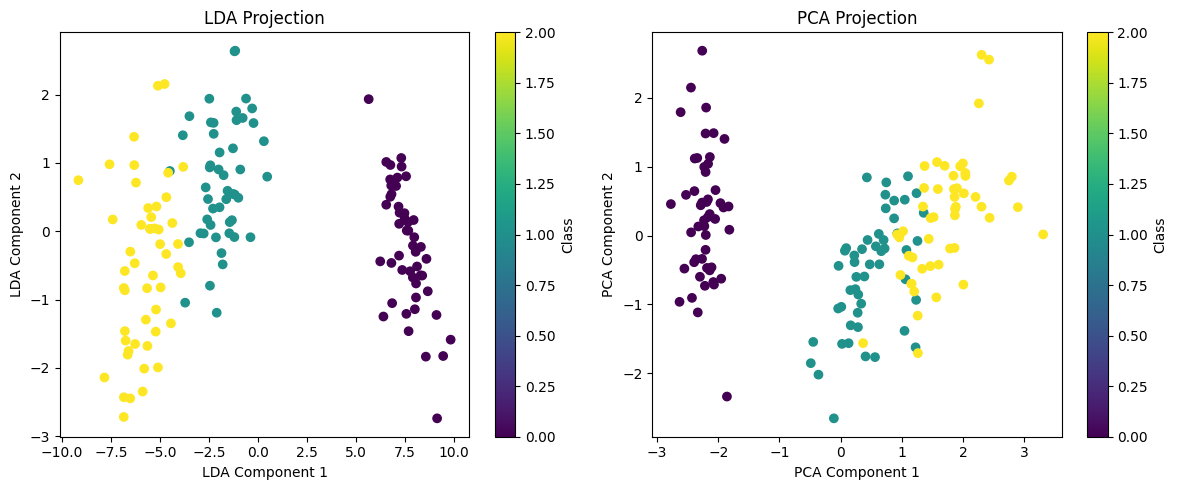


Comparing LDA and PCA
- LDA focuses on maximizing the separation between classes.
- PCA aims to maximize variance capture in the data.

Interclass distances between classes (LDA vs. PCA):
LDA Distance: 9.4797
PCA Distance: 2.8476


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

def lda_pca_analysis():
    # Load and prepare data
    print("Data Preparation Step")
    iris = load_iris()
    X, y = iris.data, iris.target

    # Standardize features for optimal results
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    print("Standardization complete - Mean:", X_standardized.mean().round(6))
    print("Standardization complete - Std:", X_standardized.std().round(6))

    # Apply Linear Discriminant Analysis (LDA)
    print("\nApplying Linear Discriminant Analysis (LDA)")
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit_transform(X_standardized, y)
    print("Input shape:", X.shape)
    print("LDA-transformed shape:", X_lda.shape)
    print("Variance explained by LDA components:", lda.explained_variance_ratio_.round(4))

    # Apply Principal Component Analysis (PCA) for comparison
    print("\nApplying Principal Component Analysis (PCA)")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_standardized)
    print("Variance explained by PCA components:", pca.explained_variance_ratio_.round(4))

    # Visualization of LDA and PCA results
    print("\nGenerating visualizations for comparison")
    plt.figure(figsize=(12, 5))

    # LDA visualization
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
    plt.title('LDA Projection')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.colorbar(scatter, label='Class')

    # PCA visualization
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.title('PCA Projection')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, label='Class')

    plt.tight_layout()
    plt.show()

    # Analysis
    print("\nComparing LDA and PCA")
    print("- LDA focuses on maximizing the separation between classes.")
    print("- PCA aims to maximize variance capture in the data.")

    # Interclass distances for additional insight
    lda_means = [np.mean(X_lda[y == i], axis=0) for i in range(3)]
    pca_means = [np.mean(X_pca[y == i], axis=0) for i in range(3)]

    print("\nInterclass distances between classes (LDA vs. PCA):")
    print("LDA Distance:", np.linalg.norm(lda_means[0] - lda_means[1]).round(4))
    print("PCA Distance:", np.linalg.norm(pca_means[0] - pca_means[1]).round(4))

if __name__ == "__main__":
    lda_pca_analysis()
